# Производственная функция
Датасет `Labour`

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
# Импорт данных
labour_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Labour.csv')
labour_df.head(6)

,capital,labour,output,wage
0,2.606563,184,9.250759,43.080307
1,1.323237,91,3.664310,27.780016
2,22.093692,426,28.781516,44.467748
3,10.737851,72,4.124642,39.734710
4,1.161365,46,2.890150,34.650709
5,276.796701,7642,480.140372,48.939782


In [5]:
# Описательные статистика
labour_df.describe()

,capital,labour,output,wage
count,569.000000,569.000000,569.000000,569.000000
mean,11.515447,201.080844,14.719225,38.632877
std,80.518848,611.995915,62.729484,14.443246
min,0.002231,1.000000,0.026276,11.733739
25%,0.983380,45.000000,2.666305,30.810818
50%,2.199280,86.000000,4.602574,35.982820
75%,6.214602,176.000000,9.742077,42.903339
max,1786.899200,10661.000000,1279.371693,188.425081


Визуцлизация данных

<Axes: xlabel='output', ylabel='Count'>

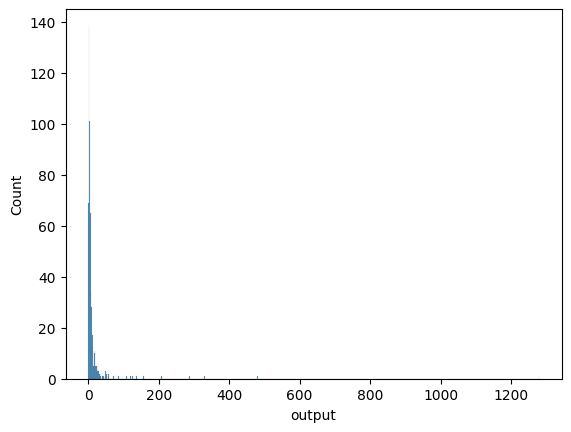

In [4]:
# Гистограмма
sns.histplot(data=labour_df, x='output')

<Axes: xlabel='output', ylabel='Count'>

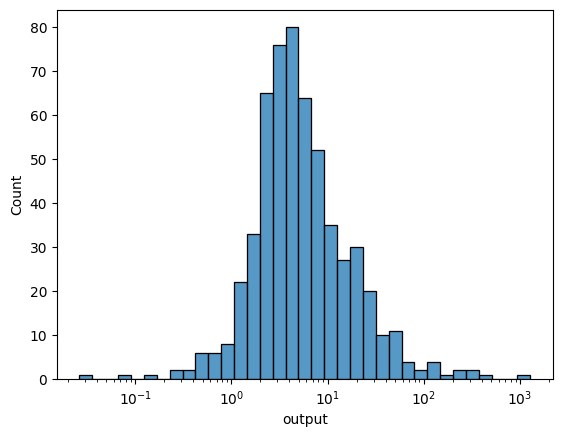

In [7]:
# Гистограмма в логарифмах
sns.histplot(data=labour_df, x='output', log_scale=True)

<Axes: xlabel='capital', ylabel='output'>

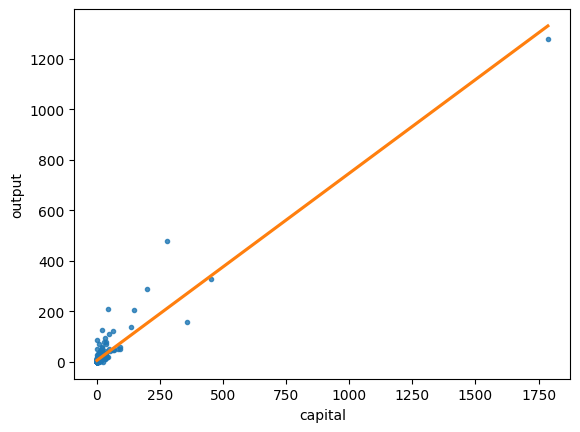

In [8]:
# Диаграмма рассеяние в исходных уровнях
sns.regplot(data=labour_df, x='capital', y='output', ci=False, marker='.', line_kws={'color':'C1'})

<Axes: xlabel='capital', ylabel='output'>

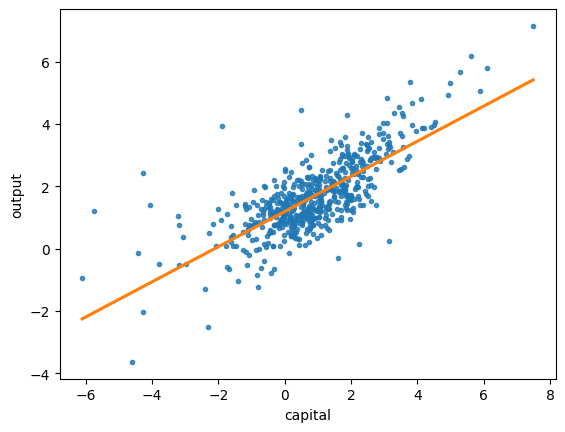

In [9]:
# Диаграмма рассеяние в логарифмах
sns.regplot(x=np.log(labour_df['capital']), y=np.log(labour_df['output']), ci=False, marker='.', line_kws={'color':'C1'})

Рассмтрим модель решрессии в логарифмах $\log(output)=\beta_0+\beta_1\log(capital)+\beta_2\log(labour)+u$

In [10]:
mod= smf.ols(formula='np.log(output)~np.log(capital)+np.log(labour)', data=labour_df).fit()
mod.params.round(2)

Intercept         -1.71
np.log(capital)    0.21
np.log(labour)     0.71
dtype: float64

Интерпретация коэффициентов:

- при увеличении капитала на 1% выпуск в среднем увеличится на 0.21% (при прочих равных, т.е. при фиксирвоанном `labour`)
- при цвеличении числа сотрудников `labour` на 1% выпуск в среднем увеличится на 0.71% (при прочих равных, т.е. при фиксированном `capital`)